<a href="https://colab.research.google.com/github/antoniosMavridis/Major_Adverse_Cardiovascular_Events/blob/main/MACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
df = pd.read_excel(r"sample_data/Risk_no_Names_copy.xlsx")
df

,Unnamed: 0,N,Day_adm,Age,NIHSS,TOAST,MRS_D,MRS_1M,Month1_TIME,MRS_3M,Month3_TIME,MRS_5Y,Y5_Time,MRS_10Y,Y10_Time,Rec_10years,Rec_1ime_10years,MACE_10years,MACE_Time_10years,New_CAD,CVDeath,Sex,HTN,DM,Smoke,TIAs,Chol,Heart_F,CAD,PAD,Alcohol,AF,AF_types,Obes,eGFR,CHADS_prior,CHADS_VASC_Prior,Diouretics_prior,B_block_prior,Ca_block_prior,...,MRS_1Y,Y1_Time,Hct,Fibr,Migr,Fe_His,Or_Con,Arrhyth,Type_Ar,V_Calc,Thr_LV,MVP,Vegetat,TEE,pfo_asd,Thr_veg,Sm_Ef,Abdom_per,CRP,ABI,US_Neck,RCar,LCar,RVer,LVer,ANG,Day_Angio,DSA_MRA,Clin_rel,RC1,RC2,LC1,LC2,RVA1,RVA2,LVA1,LVA2,Bas,P1,GCS
0,1,1,1992-06-08,69.0,22,3,5,5,30,5,90,5,60.0,6,90.0,0,90.0,0,90.0,0,0,1,1,0,1,0,0,0,0,0,0,1,2,0.0,3.500000e+01,1.0,2.0,0.0,0.0,0.0,...,5,12.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,2,2,1992-06-06,72.0,4,2,3,2,30,2,90,1,60.0,6,101.0,0,101.0,1,101.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,3.635800e+04,3.0,5.0,0.0,1.0,1.0,...,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,12.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,3,1992-06-09,52.0,4,1,1,1,30,1,90,6,60.0,6,60.0,0,60.0,1,60.0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1.0,3.500000e+01,2.0,2.0,1.0,0.0,0.0,...,1,12.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,4,4,1992-06-11,72.0,1,1,1,0,30,0,90,0,60.0,6,84.0,0,84.0,1,84.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0.0,5.300000e+01,2.0,3.0,0.0,0.0,1.0,...,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,5,5,1992-06-17,68.0,3,1,1,0,30,0,90,0,60.0,0,120.0,0,120.0,0,120.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.0,6.617923e+14,1.0,3.0,0.0,0.0,0.0,...,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,3312,3312,2016-02-14,64.0,6,3,2,2,30,1,90,1,42.0,1,42.0,0,42.0,0,42.0,0,0,1,1,0,0,0,1,0,1,0,0,1,2,NaN,7.000000e+01,2.0,3.0,1.0,0.0,0.0,...,1,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3312,3313,3313,2015-10-10,75.0,18,11,5,5,30,4,90,3,8.0,3,8.0,0,8.0,0,8.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,NaN,7.500000e+01,NaN,2.0,0.0,1.0,0.0,...,3,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3313,3314,3314,2016-05-15,62.0,11,1,3,3,30,2,90,2,6.0,2,6.0,1,0.3,1,0.3,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1.0,7.000000e+01,NaN,1.0,0.0,0.0,1.0,...,2,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3314,3315,3316,2016-09-09,NaN,14,3,4,4,30,4,90,4,36.0,3,36.0,0,36.0,0,36.0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,6.500000e+01,2.0,3.0,1.0,0.0,0.0,...,3,12.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
data_frame = df[["Age","Sex","HTN","DM","Smoke","TIAs","Chol","Heart_F","CAD","PAD","Alcohol","Vascular_Imaging_arterial_all","Vascular_Stenosis_Degree_all","PWML","AF","AF_types","Obes","eGFR"
,"TOAST","HemTransfx2","Cum_Prior","ASA_Prior","Statin_discharge","Antiplatelets_discharge","Cumadin_discharge","NOACs","Diouretics_discharge","B_block_diascharge","CA_Blocker_discharge"
,"ACEARB_discharge","LeftVentricle_Hypertrophy_by_EKG","Ischemic_abnormalites","MI_by_EKG","LeftVentricular_Wall_Abnormalities","EF","Hypertrophy_by_EECHO","Left_Atrial_diametre","Cr_adm"
,"Urea","Chol_adm","TG","HDL","LDL","Weight","High","MACE_10years","MACE_Time_10years"]]
data_frame

,Age,Sex,HTN,DM,Smoke,TIAs,Chol,Heart_F,CAD,PAD,Alcohol,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,PWML,AF,AF_types,Obes,eGFR,TOAST,HemTransfx2,Cum_Prior,ASA_Prior,Statin_discharge,Antiplatelets_discharge,Cumadin_discharge,NOACs,Diouretics_discharge,B_block_diascharge,CA_Blocker_discharge,ACEARB_discharge,LeftVentricle_Hypertrophy_by_EKG,Ischemic_abnormalites,MI_by_EKG,LeftVentricular_Wall_Abnormalities,EF,Hypertrophy_by_EECHO,Left_Atrial_diametre,Cr_adm,Urea,Chol_adm,TG,HDL,LDL,Weight,High,MACE_10years,MACE_Time_10years
0,69.0,1,1,0,1,0,0,0,0,0,0,2,1,0.0,1,2,0.0,3.500000e+01,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,65.0,198.0,NaN,NaN,NaN,NaN,NaN,0,90.0
1,72.0,0,1,0,0,1,0,0,0,0,0,2,3,0.0,0,0,0.0,3.635800e+04,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,NaN,73.0,NaN,42.0,1.5,49.0,229.0,NaN,NaN,NaN,80.0,176.0,1,101.0
2,52.0,1,1,1,1,0,1,0,0,0,0,2,2,0.0,0,0,1.0,3.500000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,2.1,61.0,347.0,209.0,52.0,253.0,NaN,NaN,1,60.0
3,72.0,1,1,1,0,0,0,0,0,0,0,2,2,1.0,0,0,0.0,5.300000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0,NaN,NaN,NaN,NaN,1.4,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1,84.0
4,68.0,0,1,0,0,0,1,0,0,0,0,1,4,0.0,0,0,1.0,6.617923e+14,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,0.9,42.0,246.0,NaN,NaN,NaN,NaN,NaN,0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,64.0,1,1,0,0,0,1,0,1,0,0,0,0,NaN,1,2,NaN,7.000000e+01,3,NaN,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,42.0
3312,75.0,1,1,0,0,0,0,0,0,0,1,0,0,0.0,0,0,NaN,7.500000e+01,11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8.0
3313,62.0,1,1,1,0,1,0,0,0,0,1,1,4,0.0,0,0,1.0,7.000000e+01,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,1.0,NaN,235.0,NaN,NaN,128.0,NaN,NaN,1,0.3
3314,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1,2,0.0,6.500000e+01,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,36.0


In [ ]:
# Irrelevant columns
cols_useless = ['MACE_Time_10years']
data_frame.drop(cols_useless, axis=1, inplace= True)

In [ ]:
data_frame.head()

,Age,Sex,HTN,DM,Smoke,TIAs,Chol,Heart_F,CAD,PAD,Alcohol,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,PWML,AF,AF_types,Obes,eGFR,TOAST,HemTransfx2,Cum_Prior,ASA_Prior,Statin_discharge,Antiplatelets_discharge,Cumadin_discharge,NOACs,Diouretics_discharge,B_block_diascharge,CA_Blocker_discharge,ACEARB_discharge,LeftVentricle_Hypertrophy_by_EKG,Ischemic_abnormalites,MI_by_EKG,LeftVentricular_Wall_Abnormalities,EF,Hypertrophy_by_EECHO,Left_Atrial_diametre,Cr_adm,Urea,Chol_adm,TG,HDL,LDL,Weight,High,MACE_10years
0,69.0,1,1,0,1,0,0,0,0,0,0,2,1,0.0,1,2,0.0,3.500000e+01,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,65.0,198.0,NaN,NaN,NaN,NaN,NaN,0
1,72.0,0,1,0,0,1,0,0,0,0,0,2,3,0.0,0,0,0.0,3.635800e+04,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,NaN,73.0,NaN,42.0,1.5,49.0,229.0,NaN,NaN,NaN,80.0,176.0,1
2,52.0,1,1,1,1,0,1,0,0,0,0,2,2,0.0,0,0,1.0,3.500000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,2.1,61.0,347.0,209.0,52.0,253.0,NaN,NaN,1
3,72.0,1,1,1,0,0,0,0,0,0,0,2,2,1.0,0,0,0.0,5.300000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0,NaN,NaN,NaN,NaN,1.4,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,68.0,0,1,0,0,0,1,0,0,0,0,1,4,0.0,0,0,1.0,6.617923e+14,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,0.9,42.0,246.0,NaN,NaN,NaN,NaN,NaN,0


# **Exploratory Data Analysis**
*   Missing values management - Data Cleaning  
*   Dataset Reshaping
*   Data Distribution

## **Percent Missing Values** 

In [ ]:
# Percentage of missing data per category
total = data_frame.isnull().sum().sort_values(ascending=False)
percent_total = (data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
LeftVentricular_Wall_Abnormalities,3110,93.787696
Hypertrophy_by_EECHO,2925,88.208685
Left_Atrial_diametre,2213,66.737033
EF,2135,64.384801
High,2106,63.510253
Weight,2102,63.389626
LDL,1223,36.881785
HDL,1185,35.735826
TG,1088,32.810615
PWML,1032,31.121834


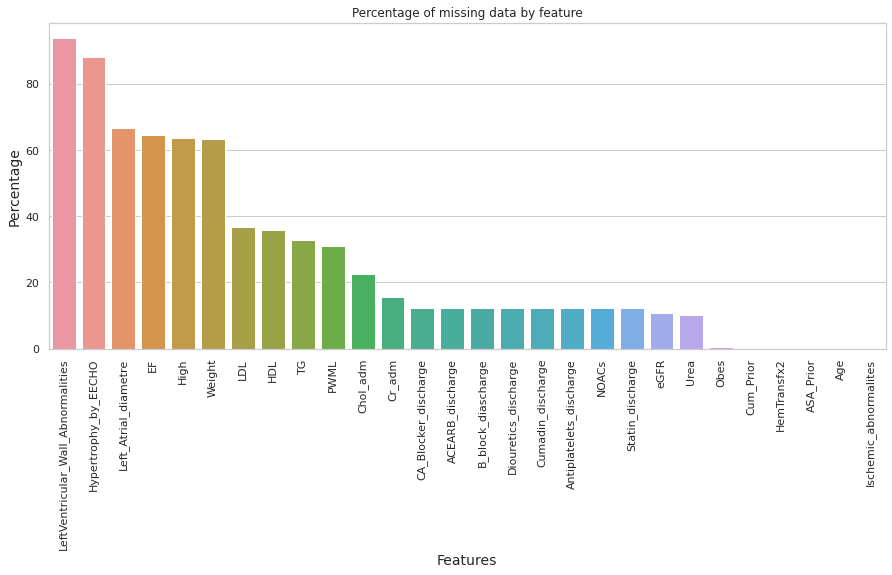

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [ ]:
# Reshaping of dataset has been performed to exclude variables where missing values exceed 30% of the total amount of samples.
data = data_frame[["Age","Sex","HTN","DM","Smoke","TIAs","Chol","Heart_F","CAD","PAD","Alcohol","Vascular_Imaging_arterial_all","Vascular_Stenosis_Degree_all","AF","AF_types","Obes","eGFR"
,"TOAST","HemTransfx2","Cum_Prior","ASA_Prior","Statin_discharge","Antiplatelets_discharge","Cumadin_discharge","NOACs","Diouretics_discharge","B_block_diascharge","CA_Blocker_discharge"
,"ACEARB_discharge","LeftVentricle_Hypertrophy_by_EKG","Ischemic_abnormalites","MI_by_EKG","Cr_adm"
,"Urea","Chol_adm","MACE_10years"]]
data

,Age,Sex,HTN,DM,Smoke,TIAs,Chol,Heart_F,CAD,PAD,Alcohol,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,AF,AF_types,Obes,eGFR,TOAST,HemTransfx2,Cum_Prior,ASA_Prior,Statin_discharge,Antiplatelets_discharge,Cumadin_discharge,NOACs,Diouretics_discharge,B_block_diascharge,CA_Blocker_discharge,ACEARB_discharge,LeftVentricle_Hypertrophy_by_EKG,Ischemic_abnormalites,MI_by_EKG,Cr_adm,Urea,Chol_adm,MACE_10years
0,69.0,1,1,0,1,0,0,0,0,0,0,2,1,1,2,0.0,3.500000e+01,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,NaN,65.0,198.0,0
1,72.0,0,1,0,0,1,0,0,0,0,0,2,3,0,0,0.0,3.635800e+04,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.5,49.0,229.0,1
2,52.0,1,1,1,1,0,1,0,0,0,0,2,2,0,0,1.0,3.500000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,2.1,61.0,347.0,1
3,72.0,1,1,1,0,0,0,0,0,0,0,2,2,0,0,0.0,5.300000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0,1.4,70.0,NaN,1
4,68.0,0,1,0,0,0,1,0,0,0,0,1,4,0,0,1.0,6.617923e+14,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.9,42.0,246.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,64.0,1,1,0,0,0,1,0,1,0,0,0,0,1,2,NaN,7.000000e+01,3,NaN,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0,0.0,0,NaN,NaN,NaN,0
3312,75.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,NaN,7.500000e+01,11,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0,NaN,NaN,NaN,0
3313,62.0,1,1,1,0,1,0,0,0,0,1,1,4,0,0,1.0,7.000000e+01,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,NaN,235.0,1
3314,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,6.500000e+01,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,0


## **Dataset Reshaping**

In [ ]:
# Reshape the dataframe without any NaN values
dr=data.dropna(how="any")
dr

,Age,Sex,HTN,DM,Smoke,TIAs,Chol,Heart_F,CAD,PAD,Alcohol,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,AF,AF_types,Obes,eGFR,TOAST,HemTransfx2,Cum_Prior,ASA_Prior,Statin_discharge,Antiplatelets_discharge,Cumadin_discharge,NOACs,Diouretics_discharge,B_block_diascharge,CA_Blocker_discharge,ACEARB_discharge,LeftVentricle_Hypertrophy_by_EKG,Ischemic_abnormalites,MI_by_EKG,Cr_adm,Urea,Chol_adm,MACE_10years
1,72.0,0,1,0,0,1,0,0,0,0,0,2,3,0,0,0.0,3.635800e+04,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.5,49.0,229.0,1
2,52.0,1,1,1,1,0,1,0,0,0,0,2,2,0,0,1.0,3.500000e+01,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,2.1,61.0,347.0,1
4,68.0,0,1,0,0,0,1,0,0,0,0,1,4,0,0,1.0,6.617923e+14,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.9,42.0,246.0,0
5,67.0,1,0,0,1,0,1,0,1,0,0,2,3,0,0,1.0,7.100000e+01,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.1,24.0,255.0,0
6,83.0,0,1,1,0,0,0,0,0,0,0,2,2,0,0,0.0,4.560042e+14,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,1.2,63.0,138.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,92.0,0,1,0,0,0,1,0,0,0,0,0,0,1,2,1.0,5.130000e+01,3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1.0,32.0,217.0,0
3160,91.0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1.0,7.840000e+01,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.7,46.0,141.0,0
3161,63.0,1,1,0,1,1,0,0,0,0,0,1,4,0,0,0.0,7.800000e+01,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.9,42.0,235.0,0
3174,49.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1.0,8.500000e+01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0,1.0,45.0,105.0,0


In [ ]:
print("Dataframe shape before reshaping:")
data.shape

Dataframe shape before reshaping:


(3316, 36)

In [ ]:
print("Dataframe shape after reshaping:")
dr.shape

Dataframe shape after reshaping:


(2080, 36)

In [ ]:
#Check for NaN values in reshaped Dataframe 
print("Number of missing values for each variable after reshaping:\n")
dr.isnull().sum()

Number of missing values for each variable after reshaping:



Age                                 0
Sex                                 0
HTN                                 0
DM                                  0
Smoke                               0
TIAs                                0
Chol                                0
Heart_F                             0
CAD                                 0
PAD                                 0
Alcohol                             0
Vascular_Imaging_arterial_all       0
Vascular_Stenosis_Degree_all        0
AF                                  0
AF_types                            0
Obes                                0
eGFR                                0
TOAST                               0
HemTransfx2                         0
Cum_Prior                           0
ASA_Prior                           0
Statin_discharge                    0
Antiplatelets_discharge             0
Cumadin_discharge                   0
NOACs                               0
Diouretics_discharge                0
B_block_dias

## **Data Distribution**

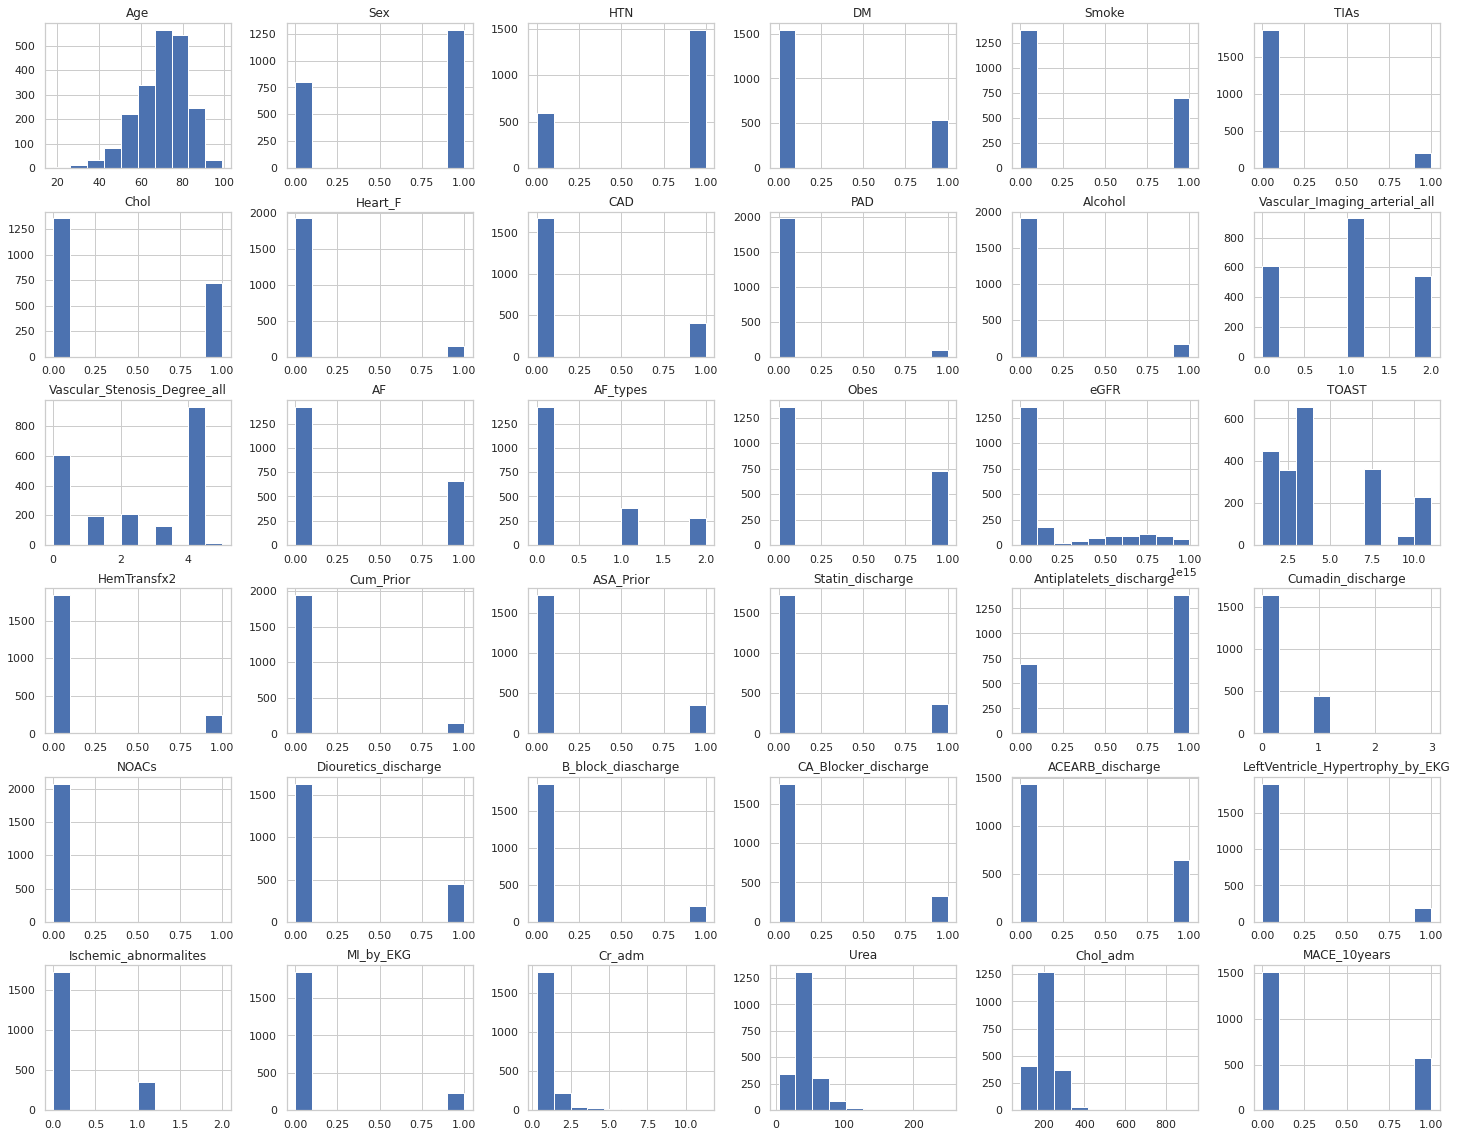

In [ ]:
# Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
dr.hist(ax = ax)
plt.show()

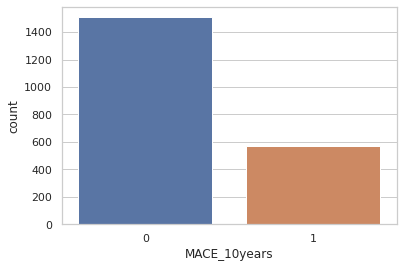

There are 1508 patients without MACE and 572 patients with the event


In [ ]:
# Case counts
sns.countplot(x='MACE_10years',data=dr)
plt.show()
cases = dr.MACE_10years.value_counts()
print(f"There are {cases[0]} patients without MACE and {cases[1]} patients with the event")

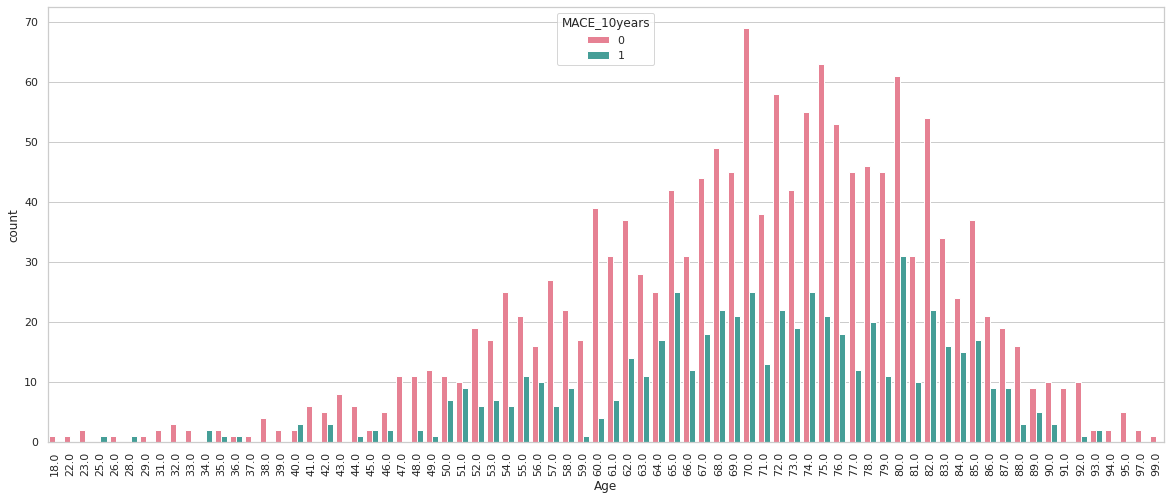

In [ ]:
# Number of people who have MACE vs Age
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data = dr, hue = 'MACE_10years',palette='husl')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

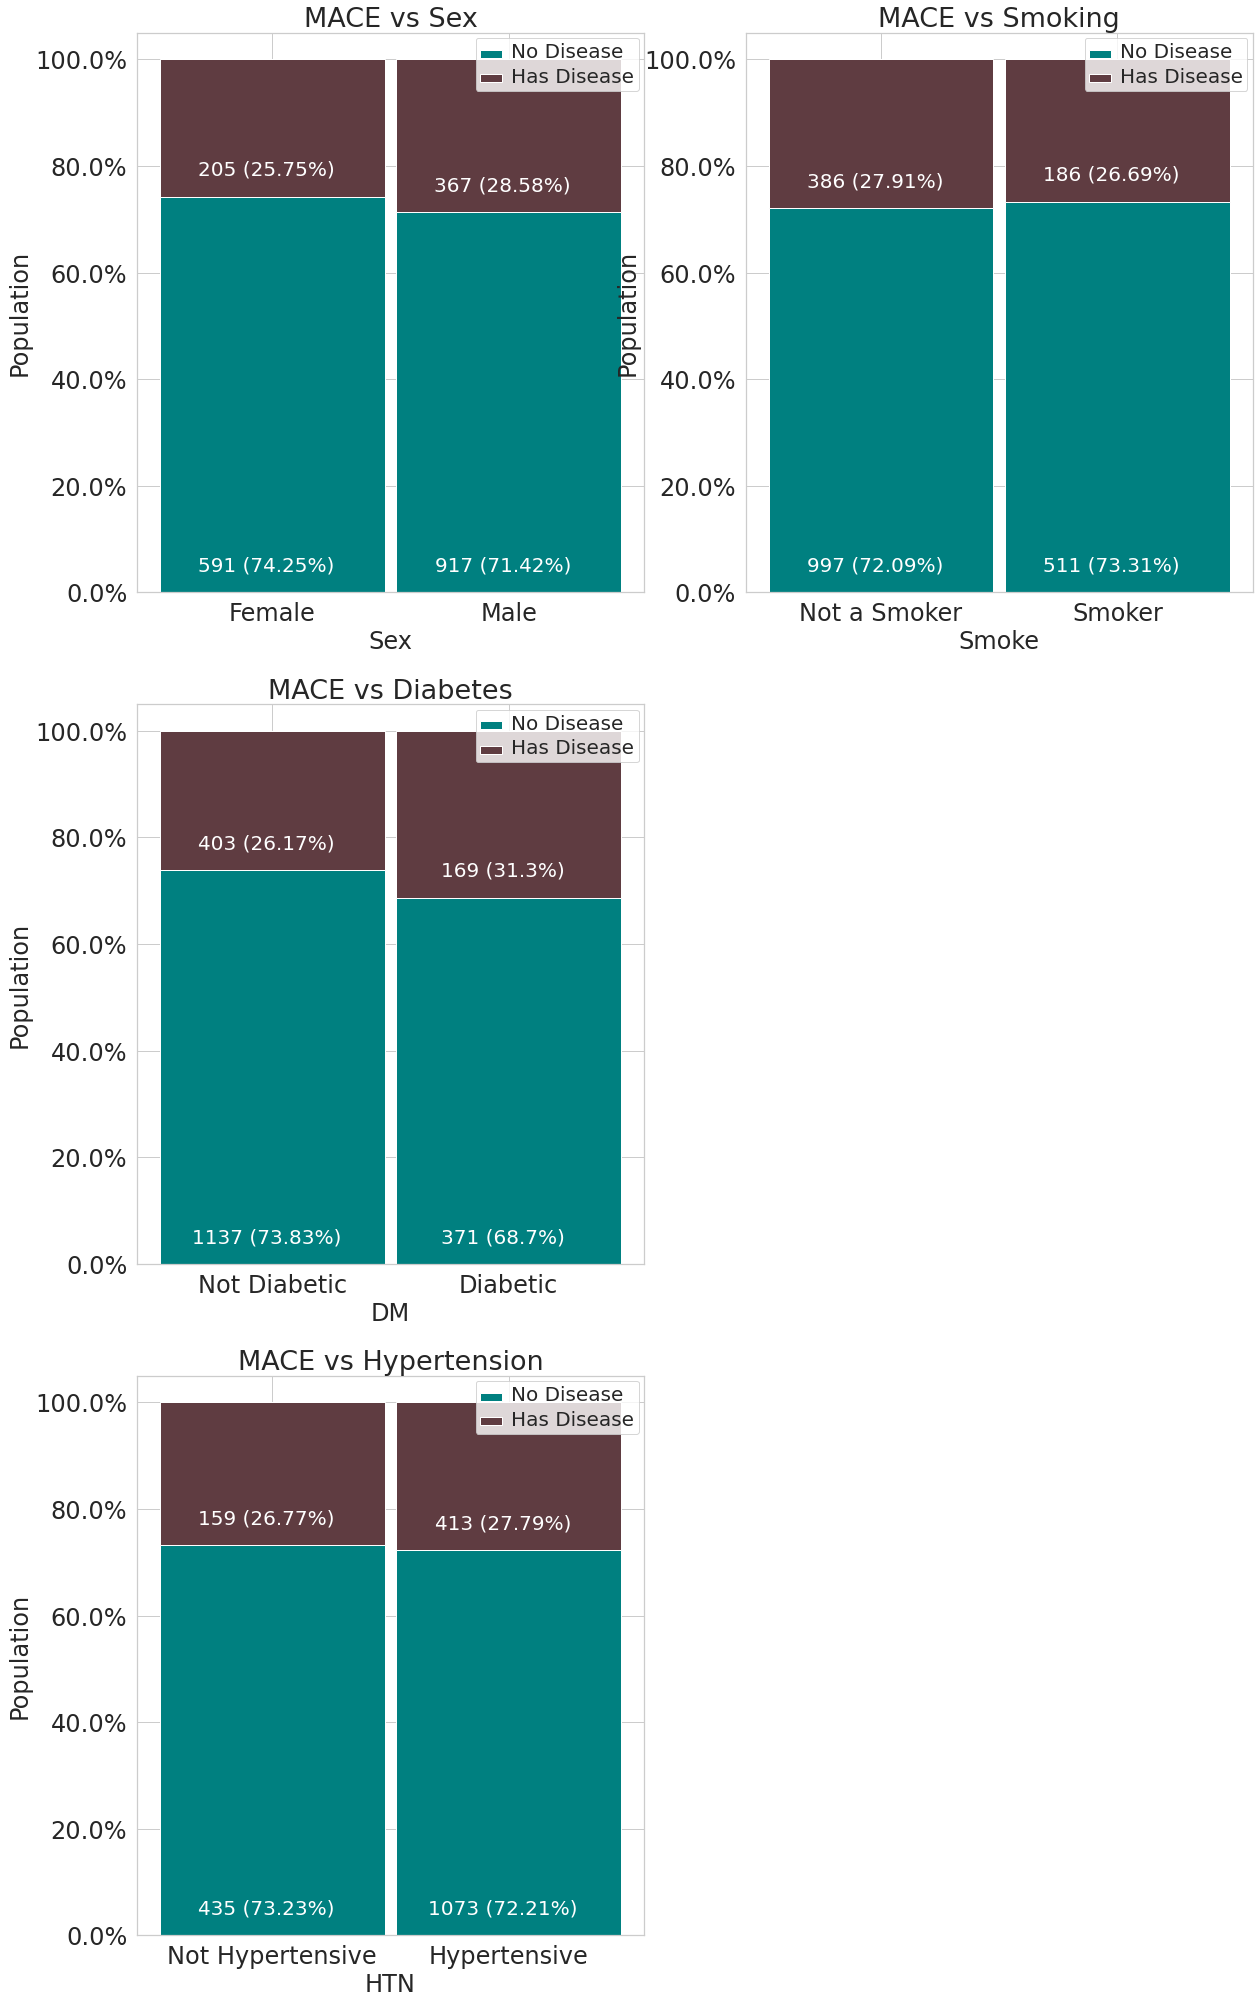

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 35)
grid_rows = 3
grid_cols = 2

# Draw Sex vs Disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = dr[['Sex','MACE_10years']].groupby(['Sex','MACE_10years']).size().unstack('MACE_10years')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'MACE vs Sex', ylabel = 'Population')

# Draw Smoking status vs Disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = dr[['Smoke','MACE_10years']].groupby(['Smoke','MACE_10years']).size().unstack('MACE_10years')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'MACE vs Smoking', ylabel = 'Population')

# Draw Diabetes vs Disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = dr[['DM','MACE_10years']].groupby(['DM','MACE_10years']).size().unstack('MACE_10years')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'MACE vs Diabetes', ylabel = 'Population')


# Draw Hypertension vs Disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = dr[['HTN','MACE_10years']].groupby(['HTN','MACE_10years']).size().unstack('MACE_10years')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'MACE vs Hypertension', ylabel = 'Population')

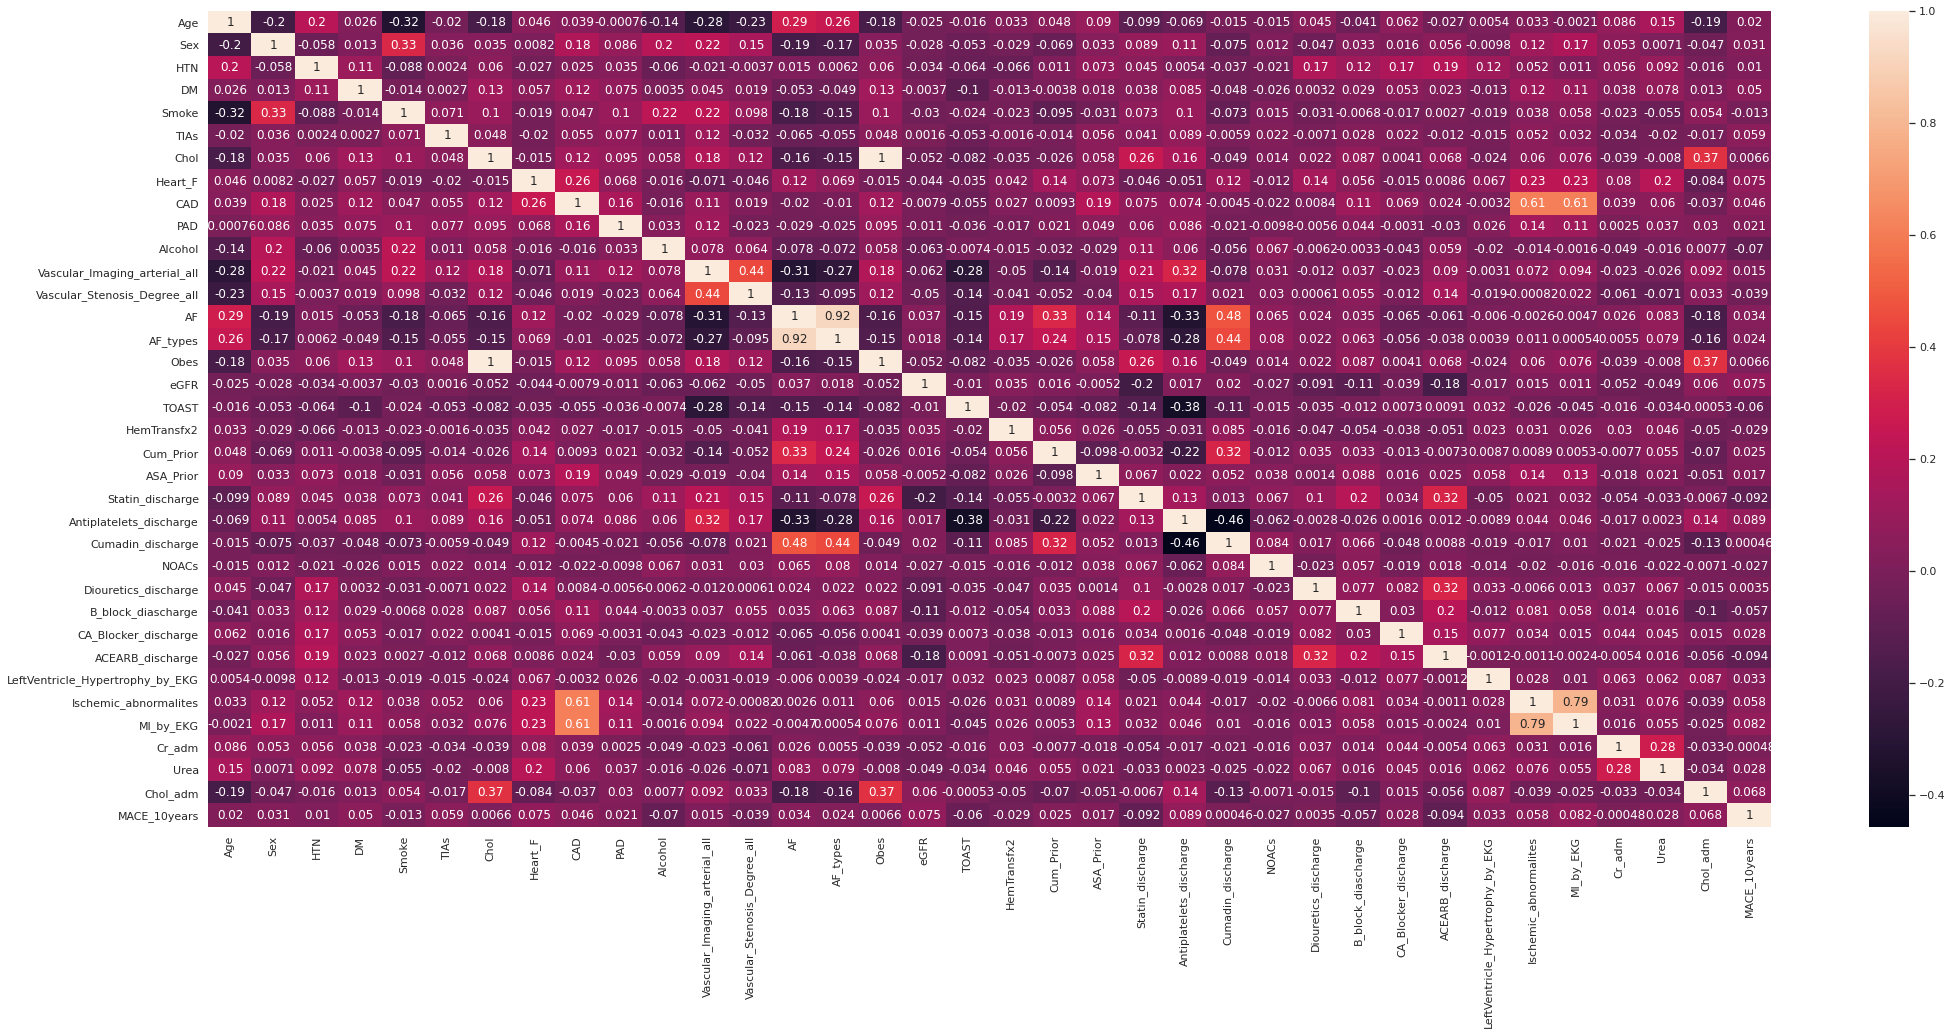

In [ ]:
# Correlation Heat Map
plt.figure(figsize=(35,15))
sns.heatmap(dr.corr(), annot = True)
plt.show()

# **Feature Selection**

Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

***Methodology:***

Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.




In [ ]:
from sklearn.ensemble import RandomForestClassifier
!pip install Boruta

     |████████████████████████████████| 61kB 1.8MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
# Define the features
X = dr.iloc[:,:-1].values
y = dr.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# Define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# Find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	33
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=20, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F66E18AA780,
                                          verbose=0, warm_star

In [ ]:
# Show the most important features
most_important = dr.columns[:-1][feat_selector.support_].tolist()
most_important

['eGFR']

In [ ]:
# Select the top 10 features
top_features = data.columns[:-1][feat_selector.ranking_ <=10].tolist()
top_features

['Age',
 'Vascular_Imaging_arterial_all',
 'Vascular_Stenosis_Degree_all',
 'eGFR',
 'TOAST',
 'Antiplatelets_discharge',
 'ACEARB_discharge',
 'Cr_adm',
 'Urea',
 'Chol_adm']

### **Statistics on the top features**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_top = dr[top_features]
y = dr['MACE_10years']

In [ ]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.578782
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           MACE_10years   No. Observations:                 2080
Model:                          Logit   Df Residuals:                     2078
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                 0.01596
Time:                        18:48:51   Log-Likelihood:                -1203.9
converged:                       True   LL-Null:                       -1223.4
Covariance Type:            nonrobust   LLR p-value:                 4.132e-10
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age                              -0.0106      0.003     -3.956      0.000      -0.016      -0.005
Vascular_Imaging_arterial_all    -0.0431      0.076     -0.565      0.572      -0.193       0.106
Vascular_Stenosis_Degree_all     -0.0850      0.031     -2.712      0.007      -0.146      -0.024
eGFR                           3.252e-16   1.62e-16      2.008      0.045    7.83e-18    6.43e-16
TOAST                            -0.0472      0.017     -2.772      0.006      -0.081      -0.014
Antiplatelets_discharge           0.3129      0.120      2.617      0.009       0.079       0.547
ACEARB_discharge                 -0.4342      0.116     -3.756      0.000      -0.661      -0.208
Cr_adm                           -0.0479      0.066     -0.730      0.465      -0.176       0.081
Urea                              0.0018      0.002      0.746      0.455      -0.003       0.006
Chol_adm                          0.0002      0.001      0.198      0.843      -0.001       0.002
=================================================================================================
"""

In [ ]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                     5%       95%  Odds Ratio
Age                            0.984311  0.994679    0.989482
Vascular_Imaging_arterial_all  0.824867  1.112186    0.957813
Vascular_Stenosis_Degree_all   0.863823  0.976703    0.918531
eGFR                           1.000000  1.000000    1.000000
TOAST                          0.922529  0.986262    0.953864
Antiplatelets_discharge        1.081693  1.728634    1.367425
ACEARB_discharge               0.516444  0.812518    0.647781
Cr_adm                         0.838231  1.083983    0.953220
Urea                           0.997102  1.006492    1.001786
Chol_adm                       0.998585  1.001736    1.000159


<Figure size 720x2160 with 0 Axes>

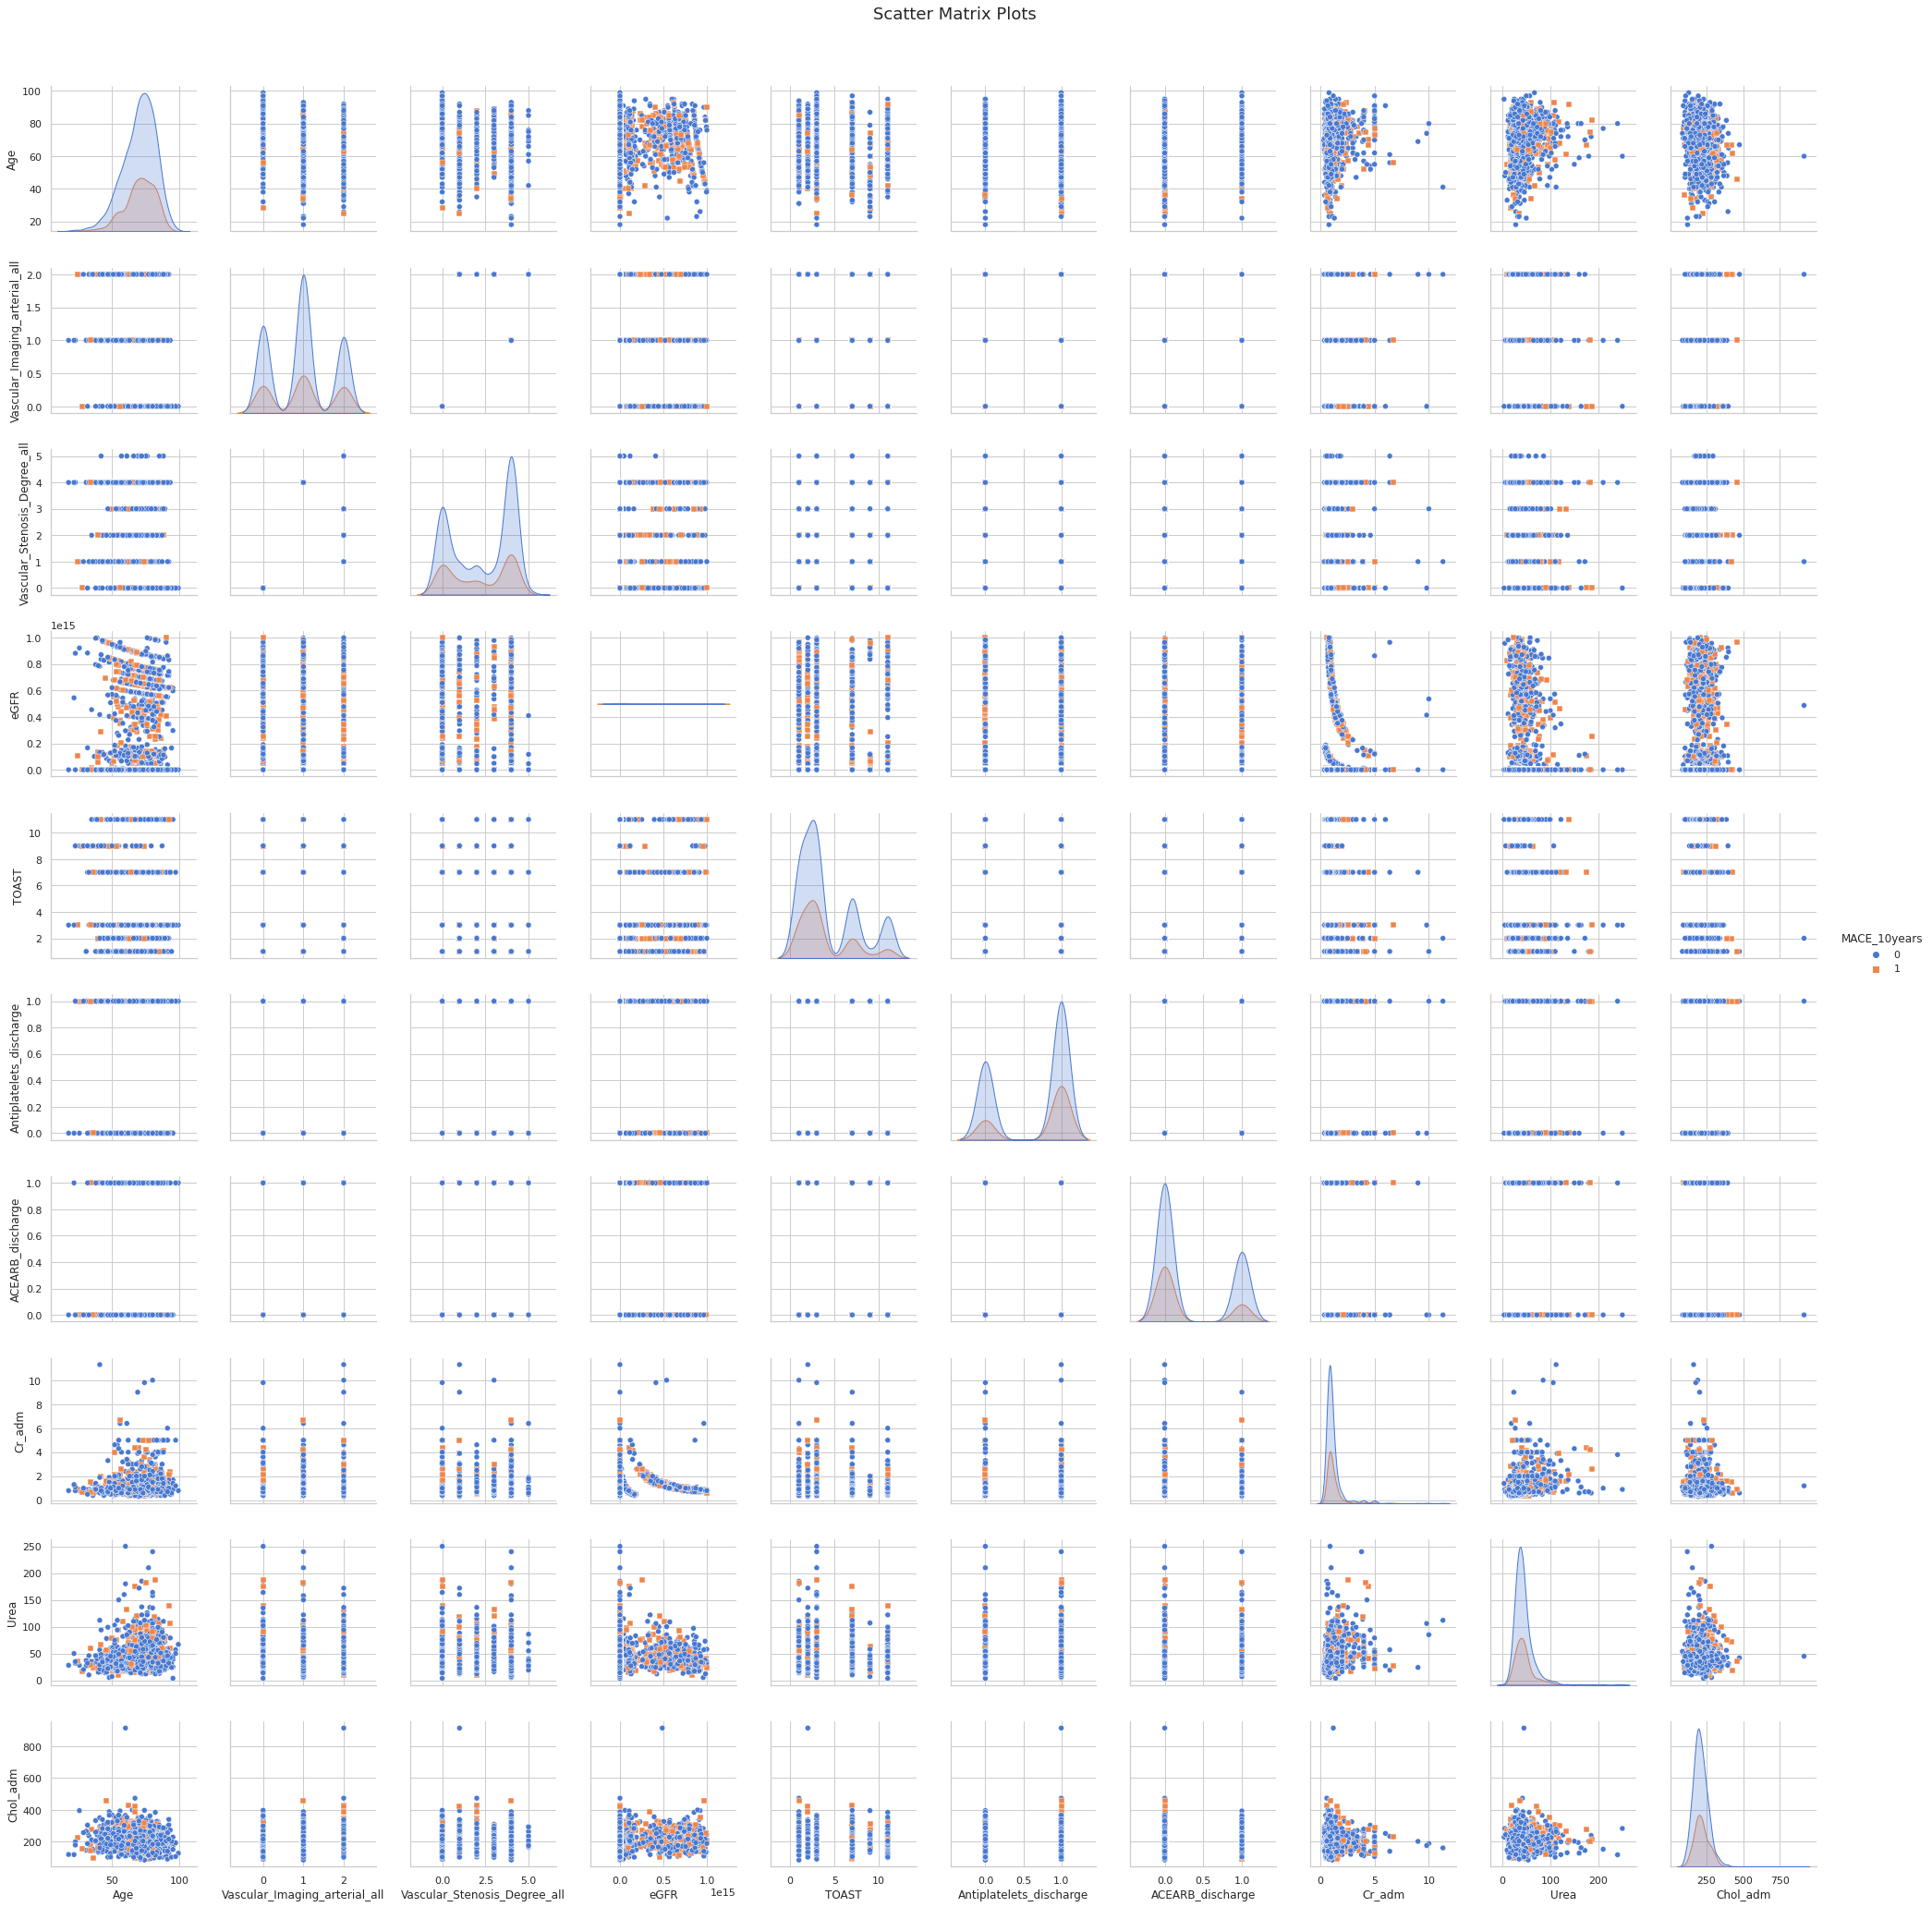

In [ ]:
plt.figure(figsize=(10,30))
sns.pairplot(data=dr, hue = 'MACE_10years', markers=["o", "s"], vars = top_features,palette="muted",size=2.8)
plt.suptitle("Scatter Matrix Plots",y=1.03,fontsize=18)
plt.show()

# **Models and Predictions**

## **Smote**

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

This procedure can be used to create as many synthetic examples for the minority class as are required. It suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X = dr[top_features]
y = dr.iloc[:,-1]

In [ ]:
# The numbers before smote
num_before = dict(Counter(y))

# Perform smoting

# Define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


# The numbers after smote
num_after =dict(Counter(y_smote))

In [ ]:
print(num_before, num_after)

{1: 572, 0: 1508} {0: 1507, 1: 1206}


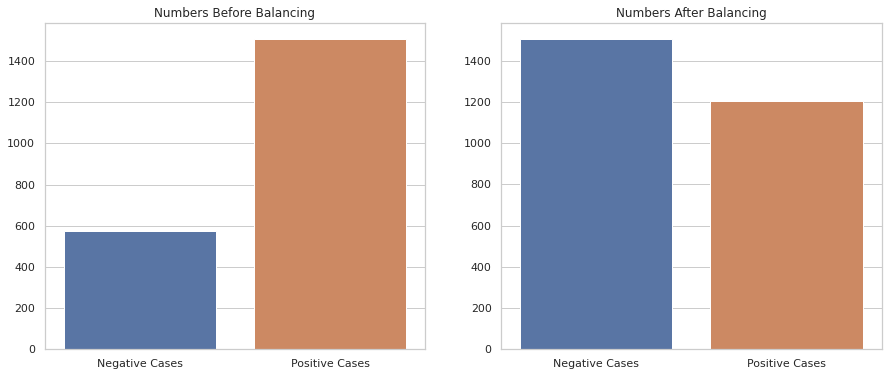

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

## **Splitting Data to Training and Testing Set**

In [ ]:
# New dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['Age',
 'Vascular_Imaging_arterial_all',
 'Vascular_Stenosis_Degree_all',
 'eGFR',
 'TOAST',
 'Antiplatelets_discharge',
 'ACEARB_discharge',
 'Cr_adm',
 'Urea',
 'Chol_adm', 'MACE_10years']
new_data.head()

,Age,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,eGFR,TOAST,Antiplatelets_discharge,ACEARB_discharge,Cr_adm,Urea,Chol_adm,MACE_10years
0,95.0,0.0,0.0,8.300000e+01,3.0,0.0,0.0,0.9,25.0,152.0,0
1,72.0,1.0,4.0,1.046220e+05,7.0,1.0,1.0,0.6,42.0,195.0,0
2,73.0,1.0,4.0,7.800000e+01,3.0,1.0,1.0,1.0,48.0,193.0,0
3,79.0,1.0,4.0,7.700000e+01,3.0,1.0,0.0,1.0,36.0,97.0,0
4,85.0,0.0,0.0,7.245677e+14,11.0,1.0,0.0,0.8,13.0,180.0,0


In [ ]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,Age,Vascular_Imaging_arterial_all,Vascular_Stenosis_Degree_all,eGFR,TOAST,Antiplatelets_discharge,ACEARB_discharge,Cr_adm,Urea,Chol_adm
0,95.0,0.0,0.0,8.300000e+01,3.0,0.0,0.0,0.9,25.0,152.0
1,72.0,1.0,4.0,1.046220e+05,7.0,1.0,1.0,0.6,42.0,195.0
2,73.0,1.0,4.0,7.800000e+01,3.0,1.0,1.0,1.0,48.0,193.0
3,79.0,1.0,4.0,7.700000e+01,3.0,1.0,0.0,1.0,36.0,97.0
4,85.0,0.0,0.0,7.245677e+14,11.0,1.0,0.0,0.8,13.0,180.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## **Models**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
# Search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [ ]:
# Train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
# Make predictions
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 53.78%


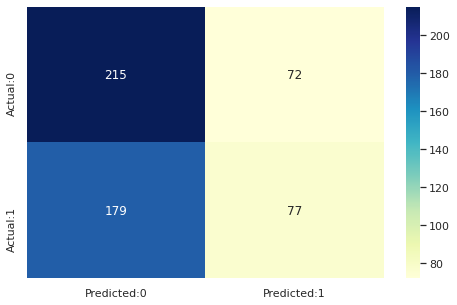

In [ ]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63       287
           1       0.52      0.30      0.38       256

    accuracy                           0.54       543
   macro avg       0.53      0.52      0.51       543
weighted avg       0.53      0.54      0.51       543



In [ ]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 38.02%


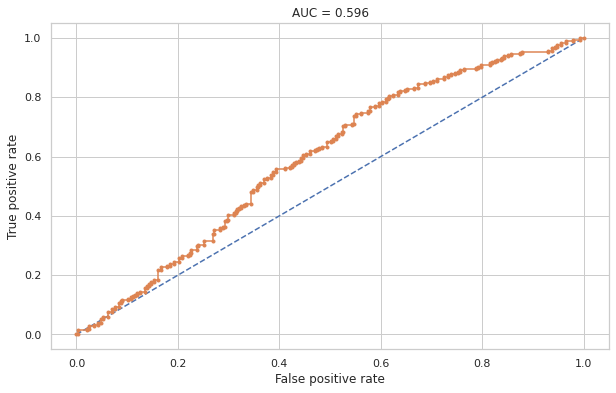

In [ ]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]
# Calculate AUC
log_auc = roc_auc_score(y_test, probs)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [ ]:
import pickle

# Save the Model to file in the current working directory
Pkl_Filename = "logistic_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logistic_clf, file)

# Load the Model to file from the current working directory
with open(Pkl_Filename, 'rb') as file:  
    mp=pickle.load(file)

# Use the Model
# mp.predict([73.0,2.0,4.0,1.034410e+14,11.0,1.0,0.0,0.7,32.0,132.0])

### **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [ ]:
# Train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
# Predictions
knn_predict = knn_clf.predict(X_test)

In [ ]:
# Accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 73.66%


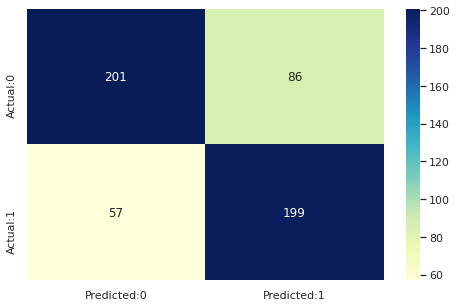

In [ ]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,knn_predict))


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       287
           1       0.70      0.78      0.74       256

    accuracy                           0.74       543
   macro avg       0.74      0.74      0.74       543
weighted avg       0.74      0.74      0.74       543



In [ ]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')


The f1 score for K nearest neignbours is 73.57%


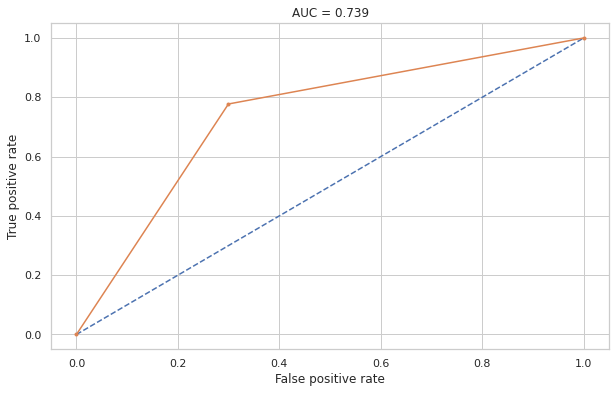

In [ ]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]
# Calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# Calculate Roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [ ]:
import pickle

# Save the Model to file in the current working directory
Pkl_Filename = "knn_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_clf, file)

# Load the Model to file from the current working directory
with open(Pkl_Filename, 'rb') as file:  
    mp=pickle.load(file)

# Use the Model
# mp.predict([73.0,2.0,4.0,1.034410e+14,11.0,1.0,0.0,0.7,32.0,132.0])

### **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [ ]:
# Grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
# Train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}

In [ ]:
# Predictions
tree_predict = tree_clf.predict(X_test)

In [ ]:
# Accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 69.06%


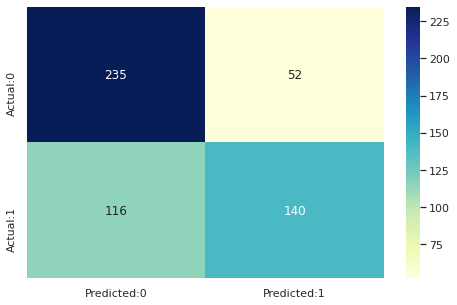

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       287
           1       0.73      0.55      0.62       256

    accuracy                           0.69       543
   macro avg       0.70      0.68      0.68       543
weighted avg       0.70      0.69      0.68       543



In [ ]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 62.5%


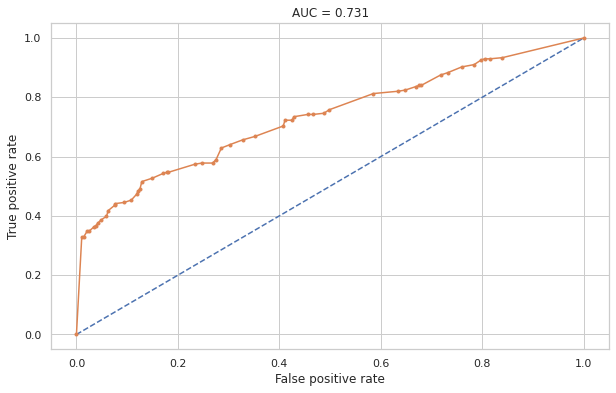

In [ ]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]
#Calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# Calculate Roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [ ]:
import pickle

# Save the Model to file in the current working directory
Pkl_Filename = "decision_tree_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree_clf, file)

# Load the Model to file from the current working directory
with open(Pkl_Filename, 'rb') as file:  
    mp=pickle.load(file)

# Use the Model
# mp.predict([73.0,2.0,4.0,1.034410e+14,11.0,1.0,0.0,0.7,32.0,132.0])

### **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# Train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 1, 'gamma': 1}

In [ ]:
# Predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
# Accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 73.11%


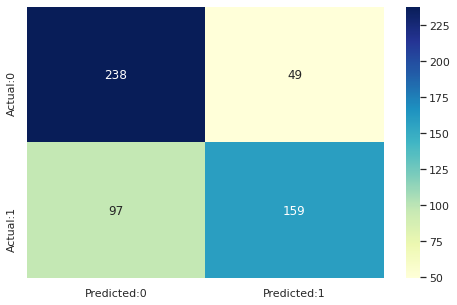

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [ ]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       287
           1       0.76      0.62      0.69       256

    accuracy                           0.73       543
   macro avg       0.74      0.73      0.73       543
weighted avg       0.74      0.73      0.73       543



In [ ]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 68.53%


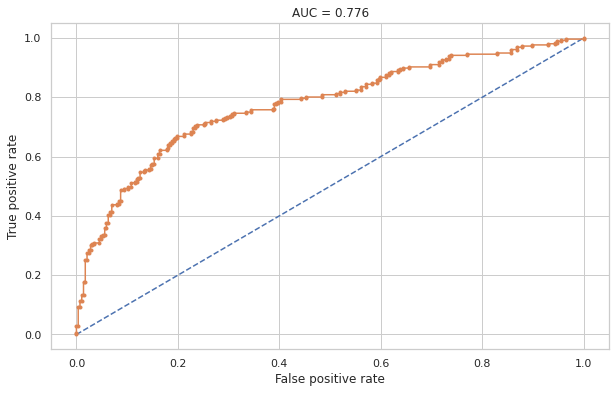

In [ ]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# Calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# Calculate Roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [ ]:
import pickle

# Save the Model to file in the current working directory
Pkl_Filename = "svm_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(svm_clf, file)

# Load the Model to file from the current working directory
with open(Pkl_Filename, 'rb') as file:  
    mp=pickle.load(file)

# Use the Model
# mp.predict([73.0,2.0,4.0,1.034410e+14,11.0,1.0,0.0,0.7,32.0,132.0])

### **Model Comparison**

In [ ]:
comparison = pd.DataFrame({
    "Logistic Regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-Nearest Neighbors":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision Trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support Vector Machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [ ]:
comparison

,Accuracy,AUC,F1 score
Logistic Regression,0.537753,0.595764,0.380247
K-Nearest Neighbors,0.736648,0.738846,0.735675
Decision Trees,0.690608,0.731081,0.625000
Support Vector Machine,0.731123,0.776303,0.685345


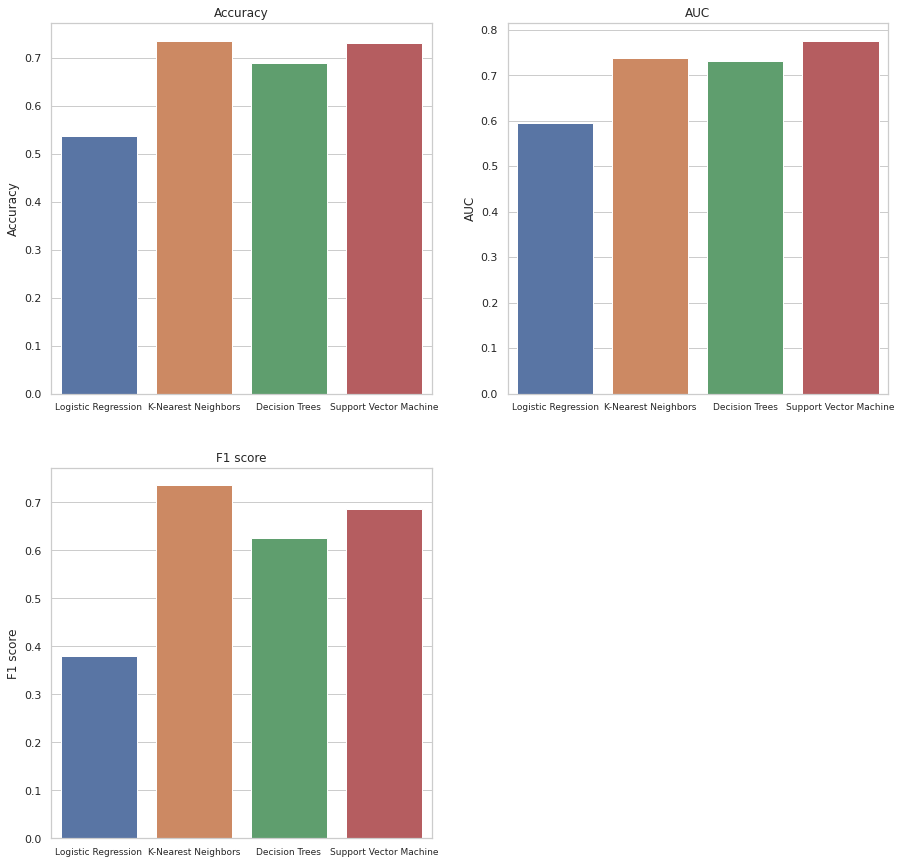

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','AUC','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.xticks(rotation=0)
    plt.title(titles[title])
plt.show()